To filter the dataset, outliers will be taken out if they are below the (first quartile - 1.5 * IQR) and above the (third quartile + 1.5 * IQR).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
airbnb = pd.read_csv("nyc_airbnb_2019.csv")
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


__Price__

In [3]:
price_firstq = np.quantile(airbnb["price"], 0.25)
price_thirdq = np.quantile(airbnb["price"], 0.75)
price_iqr = price_thirdq - price_firstq

price_filter = (airbnb["price"] > (price_firstq - 1.5 * price_iqr)) & (airbnb["price"] < (price_thirdq + 1.5 * price_iqr))
airbnb = airbnb[price_filter]

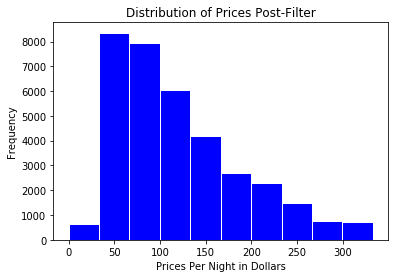

In [20]:
airbnb["price"].hist(grid = False, edgecolor = "white", color = "b")
plt.title("Distribution of Prices Post-Filter")
plt.xlabel("Prices Per Night in Dollars")
plt.ylabel("Frequency")
plt.savefig("plots/filtered_price_distribution.png")

__Minimum Nights__

In [8]:
min_nights_firstq = np.quantile(airbnb["minimum_nights"], 0.25)
min_nights_thirdq = np.quantile(airbnb["minimum_nights"], 0.75)
min_nights_iqr = min_nights_thirdq - min_nights_firstq

min_nights_filter = (airbnb["minimum_nights"] > (min_nights_firstq - 1.5 * min_nights_iqr)) & (airbnb["minimum_nights"] < (min_nights_thirdq + 1.5 * min_nights_iqr))
airbnb = airbnb[min_nights_filter]

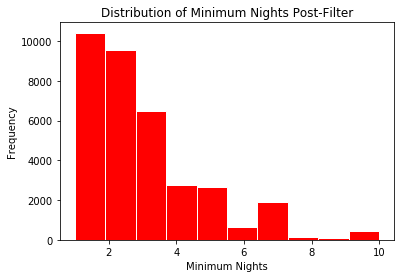

In [21]:
airbnb["minimum_nights"].hist(bins = 10, grid = False, edgecolor = "white", color = "r")
plt.title("Distribution of Minimum Nights Post-Filter")
plt.xlabel("Minimum Nights")
plt.ylabel("Frequency")
plt.savefig("plots/filtered_minimum_nights_distribution.png")

__Number of Reviews__

In [17]:
num_reviews_firstq = np.quantile(airbnb["number_of_reviews"], 0.25)
num_reviews_thirdq = np.quantile(airbnb["number_of_reviews"], 0.75)
num_reviews_iqr = num_reviews_thirdq - num_reviews_firstq

num_reviews_filter = (airbnb["number_of_reviews"] > (num_reviews_firstq - 1.5 * num_reviews_iqr)) & (airbnb["number_of_reviews"] < (num_reviews_thirdq + 1.5 * num_reviews_iqr))
airbnb = airbnb[num_reviews_filter]

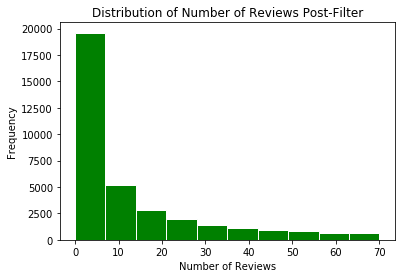

In [22]:
airbnb["number_of_reviews"].hist(grid = False, edgecolor = "white", color = "g")
plt.title("Distribution of Number of Reviews Post-Filter")
plt.xlabel("Number of Reviews")
plt.ylabel("Frequency")
plt.savefig("plots/filtered_num_reviews_distribution.png")

__Saving the DataFrame__

In [19]:
airbnb.to_csv("filtered_nyc_airbnb_2019.csv")